### **TheSocialComment - Recommendation Engine**

In [1]:
#importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset from local drive

from google.colab import files
uploaded = files.upload()

Saving posts.csv to posts.csv
Saving users.csv to users.csv
Saving views.csv to views.csv


In [3]:
#there are 3 datasets we will import them one by one and work on them 
#importing posts.csv

posts = pd.read_csv("posts.csv")
print(posts.shape)
print(posts.info())

(493, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         493 non-null    object
 1   title       493 non-null    object
 2   category    465 non-null    object
 3    post_type  493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB
None


In [4]:
#we can see that "category" has missing values
#we can't guess all categories and we will impute it with "General"
#also we will name of the columns

posts['category'].fillna("General", inplace = True) 
posts.rename(columns={'_id':'post_id', ' post_type':'post_type'}, inplace=True)
print(posts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    493 non-null    object
 1   title      493 non-null    object
 2   category   493 non-null    object
 3   post_type  493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB
None


In [5]:
#importing users.csv

users = pd.read_csv("users.csv")
print(users.shape)
print(users.info())

(118, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        118 non-null    object
 1   name       118 non-null    object
 2   gender     118 non-null    object
 3   academics  118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB
None


In [6]:
#There are no missing items
#we have to change the column name

users.rename(columns={'_id':'user_id'}, inplace=True)
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    118 non-null    object
 1   name       118 non-null    object
 2   gender     118 non-null    object
 3   academics  118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB
None


In [7]:
#importing views.csv

views = pd.read_csv("views.csv")
print(views.shape)
print(views.info())

(1449, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
dtypes: object(3)
memory usage: 34.1+ KB
None


We have imported all the datasets that we had. We now have to merge them together to get a single dataset as that will be easier for Exploratory Data Analysis. 

In [8]:
#merging datasets
#we first merge posts or users with views as it has common columns from both datasets

data = views.merge(users, on = 'user_id', how = 'left')
data.head()

,user_id,post_id,timestamp,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Parth Vijay,male,undergraduate
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,Asif Hossain,male,undergraduate
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,Asif Hossain,male,undergraduate
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Asif Hossain,male,undergraduate


In [9]:
data = data.merge(posts, on = 'post_id', how = 'left')
data.head()

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Parth Vijay,male,undergraduate,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,Asif Hossain,male,undergraduate,She got a new hairstyle! Photo by Chirag,Photography,artwork
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,Asif Hossain,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Asif Hossain,male,undergraduate,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog


In [10]:
print(data.shape)
print(data.info())

(1449, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
 3   name       1449 non-null   object
 4   gender     1449 non-null   object
 5   academics  1449 non-null   object
 6   title      1447 non-null   object
 7   category   1447 non-null   object
 8   post_type  1447 non-null   object
dtypes: object(9)
memory usage: 113.2+ KB
None


There are missing values and the values that are missing are title, category and post type. Category and post type are important and without them, the records are useless. So we will remove the rows. 

In [11]:
data = data.dropna(thresh=8)
data.shape

(1447, 9)

## **Exploratory Data Analysis**

In [12]:
#Checking for unique values in data

print(data.nunique())

user_id       118
post_id       493
timestamp    1447
name          118
gender          3
academics       3
title         477
category      232
post_type       4
dtype: int64


### Univariate Analysis

In [13]:
#There are 232 unique values for category and lets see how they are spread out

pd.set_option("display.max_rows", None, 'display.max_columns', None)
print(data.category.value_counts())

Photography                                                                                                             241
Drawings                                                                                                                149
General                                                                                                                  88
Painting                                                                                                                 75
Computer Technology|Machine Learning                                                                                     40
Computer Technology|Cloud Computing                                                                                      27
Drawings|Fashion Design|Illustration|Watercolours                                                                        22
Art                                                                                                                      18
Computer

Photography and Art are the popular categories

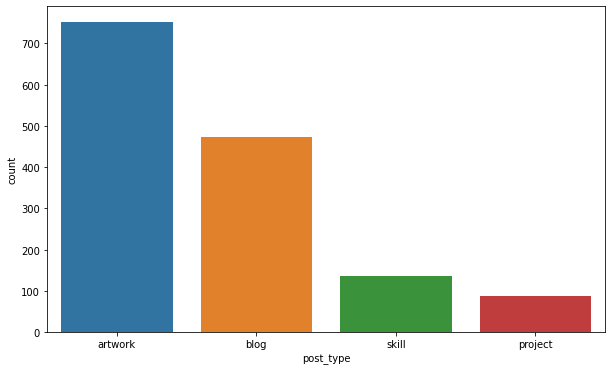

In [14]:
#How the post type is spread

plt.figure(figsize=(10,6))
sns.countplot(x = data['post_type'])
plt.show()

Artwork leads the other types. Blog is also popular compared to the other two types

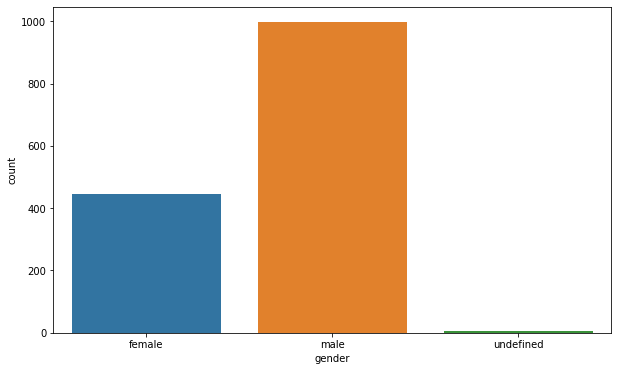

In [15]:
#How the posts are viewed based on genders

plt.figure(figsize=(10,6))
sns.countplot(x = data['gender'])
plt.show()

We can see that males are the ones with the highest viewership

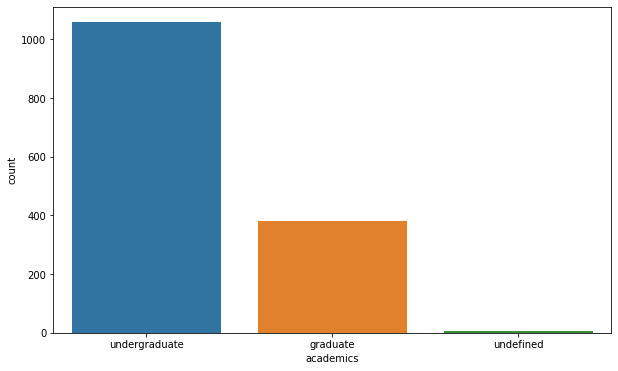

In [16]:
#How the posts are viewed based on academics

plt.figure(figsize=(10,6))
sns.countplot(x = data['academics'])
plt.show()

We can see that undergraduates are the ones viewing more posts compared to graduates and others

## Building a recommendation engine

There will be two types:

1. Content based filtering for which the users will receive posts based on their interests and views
2. Collaborative filtering for which the users will receive recommendations based on the views of other similar users

### Content Based Filtering

We will go with the similar kind of categories here

In [17]:
#filtering based on category 
# using tf-idf vectorizer as imported before to relate to categories that are similar to recommend them

tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(posts['category'])
tfidf_matrix.shape

(493, 1100)

In [18]:
tf.get_feature_names()[:-40:-1]

['zoology environmental biology',
 'zoology environmental',
 'zoology ecology',
 'zoology',
 'work substance abuse',
 'work substance',
 'work social tech',
 'work social interventions',
 'work social',
 'work ngo',
 'work humanities social',
 'work humanities',
 'work health education',
 'work health',
 'work',
 'wood crafts craft',
 'wood crafts',
 'wood carving',
 'wood',
 'web designing database',
 'web designing artificial',
 'web designing',
 'web',
 'watercolours pen ink',
 'watercolours pen',
 'watercolours painting',
 'watercolours drawings',
 'watercolours acrylics',
 'watercolours 2d composition',
 'watercolours 2d',
 'watercolours',
 'visual arts photography',
 'visual arts painting',
 'visual arts illustration',
 'visual arts graphic',
 'visual arts craft',
 'visual arts conceptual',
 'visual arts calligraphy',
 'visual arts artistic']

Now we have grouped the similar categories and the ones that we can recommend if a user in interested in any of the topics. For example, if a user views posts on visual arts, we can recommend all the categories related to it. 

### Cosine Similarity

References taken from: 

1. https://medium.com/@bkexcel2014/building-movie-recommender-systems-using-cosine-similarity-in-python-eff2d4e60d24

2. https://towardsdatascience.com/recommender-system-application-development-part-1-of-4-cosine-similarity-f6dbcd768e83

3. https://medium.com/@mark.rethana/building-a-song-recommendation-system-using-cosine-similarity-and-euclidian-distance-748fdfc832fd

Here I'm using Cosine similarity to measure how the interests are similar between two users, so that would help in better recommendation. Calculating this will be easy as we already have the TF-IDF matrix.

In [19]:
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cos_sim[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
#Creating a series just for the posts to recommend similar categories

post_num = posts['post_id']
indices = pd.Series(posts.index, index=posts['post_id'])
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: int64

In [21]:
def item(id):
    return posts.loc[posts['post_id'] == id]['title'].tolist()[0]

In [22]:
def show_recomm(postid, num, indices):
    idx = indices[postid]
    similarity_scores = list(enumerate(cos_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:num+1]
    print(similarity_scores)
    indices = [i[0] for i in similarity_scores]
    print("Recommending " + str(num) + " posts similar to \"" + item(postid) + "\" ...")
    return posts.iloc[indices, :-1]

In [23]:
show_recomm("5d7d405e5720533e15c3b1f3", 10, indices)

[(11, 1.0), (12, 1.0), (15, 1.0), (26, 1.0), (30, 1.0), (34, 1.0), (45, 1.0), (46, 1.0), (47, 1.0), (100, 1.0)]
Recommending 10 posts similar to "Lord Shiva" ...


,post_id,title,category
11,5dada695610ba040fbfdf585,Trident,Drawings
12,5dada734610ba040fbfdf588,Lord shiva,Drawings
15,5dada89b610ba040fbfdf591,Kid Bu,Drawings
26,5de7971b8eab6401affbb137,Shadow Sketch,Drawings
30,5df64ad1cc709107827fb3dd,The Chosen,Drawings
34,5e281cf0025ae20886de2050,Spartan,Drawings
45,5e36746a8d344822fed4d147,ROMAN REIGNS,Drawings
46,5e3674c68d344822fed4d152,OM,Drawings
47,5e36763d8d344822fed4d15d,MK Swords,Drawings
100,5e4ef199f5561b1994c8e4a4,Mahakaal,Drawings


In [24]:
#another try

show_recomm("5d80dfbc6c53455f896e600e", 10, indices)

[(5, 0.9999999999999998), (6, 0.9999999999999998), (7, 0.9999999999999998), (18, 0.9999999999999998), (52, 0.1881125750680073), (222, 0.1356266594211393), (0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0)]
Recommending 10 posts similar to "How Competition law evolved?" ...


,post_id,title,category
5,5d80e7c16c53455f896e6014,Raghavan Committee - 2002.,Competition Laws
6,5d80ecfd6c53455f896e601a,Let's discuss some Case laws!,Competition Laws
7,5d81323a6c53455f896e6044,Forms of Cartel.,Competition Laws
18,5db2b91a99cbb90e4339c749,CLASSIFYING FORMS OF CARTELS,Competition Laws
52,5e37c301eab55d319938a701,Custom laws,Taxation|Custom Laws
222,5e895ceca3258347b42f25b6,What are Set Off and Carry Forward Losses,Legal Studies|Income Tax Laws
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings


We can see that the recommendations are based on similar categories. This is category based

We will now create a recommendation system based on getting more data from the data set. We will do feature engineering to create new features and check with the recommendation system function

In [25]:
posts['combi'] = posts['title'] + " " + posts['category'] + " " + posts['post_type']
posts.head()

,post_id,title,category,post_type,combi
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


Since we created a new column. We will use this with the TF-IDF vectorizer

In [26]:
tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 8), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(posts['combi'])
tfidf_matrix.shape

(493, 9235)

In [27]:
# Determine cosine similarities

cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cos_sim[0]

array([1.        , 0.00500228, 0.01048471, 0.        , 0.00709757,
       0.00709386, 0.0060751 , 0.00868397, 0.01349195, 0.00802797,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00842108, 0.        , 0.00711724, 0.        ,
       0.        , 0.        , 0.00643514, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00810718, 0.        ,
       0.        , 0.00713905, 0.        , 0.00704041, 0.        ,
       0.00531304, 0.00607756, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00810718, 0.00398069,
       0.        , 0.        , 0.        , 0.00579384, 0.01038532,
       0.00547773, 0.00446786, 0.00663773, 0.00573105, 0.00580979,
       0.00650094, 0.00694541, 0.00506902, 0.00436214, 0.00661031,
       0.0051112 , 0.00694541, 0.        , 0.00799855, 0.00792602,
       0.        , 0.00599686, 0.00522975, 0.00662211, 0.00702204,
       0.00528835, 0.00475759, 0.00650647, 0.00686282, 0.00587

In [28]:
post_num = posts['post_id']
indices = pd.Series(posts.index, index=posts['post_id'])
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: int64

In [29]:
#trying recommendations after adding new column

show_recomm('5d7d405e5720533e15c3b1f3', 10, indices)

[(12, 0.9999999999999999), (83, 0.1898394409121157), (167, 0.18977266531678674), (174, 0.12807622644013977), (149, 0.12655866764144946), (415, 0.11814918453466788), (46, 0.11674531403520885), (100, 0.11674531403520885), (232, 0.11674531403520885), (401, 0.11674531403520885)]
Recommending 10 posts similar to "Lord Shiva" ...


,post_id,title,category,post_type
12,5dada734610ba040fbfdf588,Lord shiva,Drawings,artwork
83,5e4af475f5561b1994c8e385,Lord shiva (Shadow Drawing),Drawings|Artistic design,artwork
167,5e7b1e65cfc8b713f5ac7d90,Shiva Portrait,Drawings,artwork
174,5e7de48ca3258347b42f2110,Painting,Drawings,artwork
149,5e78ae4ccfc8b713f5ac7cde,Sketch,Drawings,artwork
415,5ec1fd0974f7660d73aa0fd5,Daaku,Drawings,artwork
46,5e3674c68d344822fed4d152,OM,Drawings,artwork
100,5e4ef199f5561b1994c8e4a4,Mahakaal,Drawings,artwork
232,5e8d539ba3258347b42f26d8,BEING CREATIVE☺☺,Drawings,artwork
401,5eb4fbe910426255a7aaa105,God,Drawings,artwork


In [30]:
show_recomm('5d80dfbc6c53455f896e600e', 10, indices) 

[(7, 0.2580779988571367), (18, 0.2115166354683314), (5, 0.21082166260072033), (6, 0.20054138038384417), (52, 0.08926555325456884), (76, 0.05789060230315669), (222, 0.04412772977227829), (373, 0.04185895728436844), (370, 0.03433019074380454), (67, 0.03115041905206988)]
Recommending 10 posts similar to "How Competition law evolved?" ...


,post_id,title,category,post_type
7,5d81323a6c53455f896e6044,Forms of Cartel.,Competition Laws,blog
18,5db2b91a99cbb90e4339c749,CLASSIFYING FORMS OF CARTELS,Competition Laws,blog
5,5d80e7c16c53455f896e6014,Raghavan Committee - 2002.,Competition Laws,blog
6,5d80ecfd6c53455f896e601a,Let's discuss some Case laws!,Competition Laws,blog
52,5e37c301eab55d319938a701,Custom laws,Taxation|Custom Laws,blog
76,5e3fd57aeab55d319938a826,Labour law,Legal Studies|Labor Law,blog
222,5e895ceca3258347b42f25b6,What are Set Off and Carry Forward Losses,Legal Studies|Income Tax Laws,blog
373,5eaf322910426255a7aa9efa,Corporate Influence,Legal Studies|Company Law|Legal System|Banking...,blog
370,5eac578010426255a7aa9eba,Indian Polity And Governance.,Legal Studies|Legal System|Legal Tradition|Nat...,blog
67,5e3fc931eab55d319938a7f4,SPORTS LEGISLATIONS IN INDIA,Sports Coaching|Sports Law,blog


In [31]:
show_recomm('5d6d39567fa40e1417a4931c', 10, indices)

[(122, 0.11201878821113634), (128, 0.1114117778086495), (16, 0.10052591514238947), (110, 0.10052591514238947), (486, 0.0999274821304145), (170, 0.0974602001200933), (224, 0.08818013757412546), (455, 0.083115805328667), (291, 0.08031740937210118), (456, 0.07959467198152906)]
Recommending 10 posts similar to "Ml and AI" ...


,post_id,title,category,post_type
122,5e5bdf4fd701ab08af792bfd,Artificial Intelligence,Computer Technology|Artificial Intelligence,blog
128,5e65346c85ae350860168b53,What is Information technology?,Computer Technology|Information Technology,blog
16,5dadf6ae610ba040fbfdf5c8,MIS,Computer Technology|Information Technology,blog
110,5e51a46ad701ab08af7929cf,Ethernet,Computer Technology|Information Technology,blog
486,5ed2502b76027d35905cc7db,Learning...,Computer Technology|Machine Learning,blog
170,5e7c78fdcfc8b713f5ac7daa,Types Of AI.,Computer Technology|Artificial Intelligence,blog
224,5e897ab4a3258347b42f25ca,10 Best Artificial Intelligence (AI) Courses O...,Computer Technology|Machine Learning,blog
455,5ecf96e876027d35905cbf46,GAN's Part(2),Computer Technology|Machine Learning,blog
291,5e966ad3a3258347b42f2aaf,8 Best Machine Learning Courses for 2020,Computer Technology|Cloud Computing|Artificial...,blog
456,5ecfa0ca76027d35905cbf57,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog


The last time we used the post id "5d80dfbc6c53455f896e600e", we had recommendations for Plant Biotechnology, AI and Drawings along with Law. Now we can see that we only have recommendations related to law. So adding a new feature has improved the system.

### Collaborative Filtering

In [32]:
data.head()

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Parth Vijay,male,undergraduate,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,Asif Hossain,male,undergraduate,She got a new hairstyle! Photo by Chirag,Photography,artwork
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,Asif Hossain,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Asif Hossain,male,undergraduate,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog


In [33]:
post_dict = dict(data['post_id'].value_counts())
val = data['post_id'].value_counts().tolist()

In [34]:
#We will assign ratings to the keys and rescaling the values

for key, value in post_dict.items():
        post_dict[key] = (4)*((value-min(val))/(max(val)-min(val))) + 1

In [35]:
#We will assign rating to corresponding postid's

for key, value in post_dict.items():
        data.loc[data['post_id'] == key ,'rating'] = value

In [36]:
#Timestamp is not needed for us

data.drop(['timestamp'],axis=1, inplace=True)

In [37]:
data.head()

,user_id,post_id,name,gender,academics,title,category,post_type,rating
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,3.117647
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,Parth Vijay,male,undergraduate,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,1.000000
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,Asif Hossain,male,undergraduate,She got a new hairstyle! Photo by Chirag,Photography,artwork,1.235294
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,Asif Hossain,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,3.588235
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,Asif Hossain,male,undergraduate,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,1.705882


In [38]:
#pivot table for user id vs post id

data1 = data.pivot_table(index= ['user_id'], columns= ['post_id'], values='rating')
data1.head()

post_id,5d62abaa65218653a132c956,5d6d39567fa40e1417a4931c,5d7d23315720533e15c3b1ee,5d7d405e5720533e15c3b1f3,5d80dfbc6c53455f896e600e,5d80e7c16c53455f896e6014,5d80ecfd6c53455f896e601a,5d81323a6c53455f896e6044,5d9b3514979d5962253c2f90,5d9b950768671220a1b2b153,5da745b6019399436815c4cd,5dada695610ba040fbfdf585,5dada734610ba040fbfdf588,5dada798610ba040fbfdf58b,5dada82f610ba040fbfdf58e,5dada89b610ba040fbfdf591,5dadf6ae610ba040fbfdf5c8,5db2a7d099cbb90e4339c734,5db2b91a99cbb90e4339c749,5dbc622a99cbb90e4339c7f6,5dbc631f99cbb90e4339c7fd,5dc065ca24b883670268772f,5dd1751db802e41ed198b680,5dde6a91369b28584ecca156,5ddeb6e80eb5e25a8a07f065,5de179d80eb5e25a8a07f079,5de7971b8eab6401affbb137,5de8d73249e8203ff9219a74,5dea816a42a8854bf6eaba89,5dee9b5042a8854bf6eabaaf,5df64ad1cc709107827fb3dd,5e04fb252a37d20505da2a2b,5e1029f22a37d20505da2a79,5e27002d2a37d20505da2c13,5e281cf0025ae20886de2050,5e2867f6025ae20886de205a,5e294fd1c85ab714a7da6643,5e2d36ebc85ab714a7da66d1,5e2d3fbfc85ab714a7da66d5,5e2d447dc85ab714a7da66d7,5e2d4737c85ab714a7da66d9,5e2d4d63c85ab714a7da66db,5e2d516fc85ab714a7da66dd,5e2f1811c85ab714a7da670d,5e31a591c85ab714a7da6760,5e36746a8d344822fed4d147,5e3674c68d344822fed4d152,5e36763d8d344822fed4d15d,5e36db70eab55d319938a6cc,5e36e7baeab55d319938a6d1,5e372ee2eab55d319938a6ed,5e37c087eab55d319938a700,5e37c301eab55d319938a701,5e37c78aeab55d319938a703,5e37ce10eab55d319938a710,5e37d08ceab55d319938a711,5e37d1afeab55d319938a712,5e37d490eab55d319938a713,5e37d699eab55d319938a71a,5e37d8c9eab55d319938a71e,5e37d9eaeab55d319938a71f,5e37dc1aeab55d319938a720,5e3ab644eab55d319938a72d,5e3c7293eab55d319938a74d,5e3e9cc0eab55d319938a79b,5e3ea110eab55d319938a7a7,5e3fc856eab55d319938a7f2,5e3fc931eab55d319938a7f4,5e3fcb74eab55d319938a806,5e3fcc56eab55d319938a808,5e3fcd38eab55d319938a81a,5e3fce21eab55d319938a81c,5e3fcfcdeab55d319938a81e,5e3fd10aeab55d319938a820,5e3fd290eab55d319938a822,5e3fd3bdeab55d319938a824,5e3fd57aeab55d319938a826,5e41b98eeab55d319938a82d,5e41bd7deab55d319938a839,5e431bf9eab55d319938a86a,5e45ae70f5561b1994c8e320,5e45b5c9f5561b1994c8e32d,5e4a3cf6f5561b1994c8e378,5e4af475f5561b1994c8e385,5e4ba3a9f5561b1994c8e392,5e4ba8b2f5561b1994c8e39f,5e4c28c5f5561b1994c8e3b0,5e4c2e65f5561b1994c8e3bd,5e4c3873f5561b1994c8e3d9,5e4c3c09f5561b1994c8e3e6,5e4c3d1df5561b1994c8e3f3,5e4c435cf5561b1994c8e400,5e4d359cf5561b1994c8e424,5e4da502f5561b1994c8e42c,5e4da7c8f5561b1994c8e439,5e4dab15f5561b1994c8e446,5e4ed85af5561b1994c8e470,5e4ed8ccf5561b1994c8e47d,5e4edd1bf5561b1994c8e48a,5e4edd87f5561b1994c8e497,5e4ef199f5561b1994c8e4a4,5e50141ed15de17a8cf1b912,5e501d55d15de17a8cf1b91f,5e50207cd15de17a8cf1b92c,5e5023f1d15de17a8cf1b939,5e502673d15de17a8cf1b946,5e518c9fd701ab08af79299a,5e5196b5d701ab08af7929a8,5e519e8fd701ab08af7929b5,5e51a2cfd701ab08af7929c2,5e51a46ad701ab08af7929cf,5e51a9e8d701ab08af7929dc,5e52e1b0d701ab08af7929eb,5e52e7abd701ab08af7929f8,5e52f2b8d701ab08af792a05,5e52f911d701ab08af792a12,5e52fd0ed701ab08af792a1f,5e5b561cd701ab08af792b8a,5e5b59bcd701ab08af792b8f,5e5b59cbd701ab08af792b90,5e5b6320d701ab08af792b9d,5e5bb3eed701ab08af792bfa,5e5bdf4fd701ab08af792bfd,5e5e3b35fbc8805f69e02c9e,5e5e7e0afbc8805f69e02ca8,5e5e81e8fbc8805f69e02cab,5e5facf649d7f322c033e02b,5e5fcd9a49d7f322c033e02f,5e65346c85ae350860168b53,5e6eff8aed32a005135d6bb8,5e7082f91b24db0468e90cc5,5e7220891b24db0468e90ce2,5e7304761b24db0468e90ce7,5e733f1c1b24db0468e90cf1,5e767d501b24db0468e90d54,5e7680361b24db0468e90d66,5e773c0bcfc8b713f5ac7ab7,5e773c89cfc8b713f5ac7ac9,5e773e15cfc8b713f5ac7ad9,5e7743ebcfc8b713f5ac7aeb,5e776c1fcfc8b713f5ac7b23,5e77738bcfc8b713f5ac7b36,5e778ffccfc8b713f5ac7b50,5e77bdc2cfc8b713f5ac7be4,5e77c625cfc8b713f5ac7c0b,5e782cd9cfc8b713f5ac7c4f,5e783590cfc8b713f5ac7c5d,5e7838bdcfc8b713f5ac7c99,5e787636cfc8b713f5ac7cbe,5e78ae4ccfc8b713f5ac7cde,5e78c64acfc8b713f5ac7ce7,5e78d6dccfc8b713f5ac7cf4,5e79b32ecfc8b713f5ac7d3f,5e79b8becfc8b713f5ac7d45,5e79cf2acfc8b713f5ac7d4e,5e79f3fccfc8b713f5ac7d54,5e7a0d85cfc8b713f5ac7d77,5e7a0fa1cfc8b713f5ac7d78,5e7a5ebdcfc8b713f5ac7d7f,5e7a5f5dcfc8b713f

In [39]:
#we will fill the na values with 0

data1 = data1.fillna(0)
data1.head()

post_id,5d62abaa65218653a132c956,5d6d39567fa40e1417a4931c,5d7d23315720533e15c3b1ee,5d7d405e5720533e15c3b1f3,5d80dfbc6c53455f896e600e,5d80e7c16c53455f896e6014,5d80ecfd6c53455f896e601a,5d81323a6c53455f896e6044,5d9b3514979d5962253c2f90,5d9b950768671220a1b2b153,5da745b6019399436815c4cd,5dada695610ba040fbfdf585,5dada734610ba040fbfdf588,5dada798610ba040fbfdf58b,5dada82f610ba040fbfdf58e,5dada89b610ba040fbfdf591,5dadf6ae610ba040fbfdf5c8,5db2a7d099cbb90e4339c734,5db2b91a99cbb90e4339c749,5dbc622a99cbb90e4339c7f6,5dbc631f99cbb90e4339c7fd,5dc065ca24b883670268772f,5dd1751db802e41ed198b680,5dde6a91369b28584ecca156,5ddeb6e80eb5e25a8a07f065,5de179d80eb5e25a8a07f079,5de7971b8eab6401affbb137,5de8d73249e8203ff9219a74,5dea816a42a8854bf6eaba89,5dee9b5042a8854bf6eabaaf,5df64ad1cc709107827fb3dd,5e04fb252a37d20505da2a2b,5e1029f22a37d20505da2a79,5e27002d2a37d20505da2c13,5e281cf0025ae20886de2050,5e2867f6025ae20886de205a,5e294fd1c85ab714a7da6643,5e2d36ebc85ab714a7da66d1,5e2d3fbfc85ab714a7da66d5,5e2d447dc85ab714a7da66d7,5e2d4737c85ab714a7da66d9,5e2d4d63c85ab714a7da66db,5e2d516fc85ab714a7da66dd,5e2f1811c85ab714a7da670d,5e31a591c85ab714a7da6760,5e36746a8d344822fed4d147,5e3674c68d344822fed4d152,5e36763d8d344822fed4d15d,5e36db70eab55d319938a6cc,5e36e7baeab55d319938a6d1,5e372ee2eab55d319938a6ed,5e37c087eab55d319938a700,5e37c301eab55d319938a701,5e37c78aeab55d319938a703,5e37ce10eab55d319938a710,5e37d08ceab55d319938a711,5e37d1afeab55d319938a712,5e37d490eab55d319938a713,5e37d699eab55d319938a71a,5e37d8c9eab55d319938a71e,5e37d9eaeab55d319938a71f,5e37dc1aeab55d319938a720,5e3ab644eab55d319938a72d,5e3c7293eab55d319938a74d,5e3e9cc0eab55d319938a79b,5e3ea110eab55d319938a7a7,5e3fc856eab55d319938a7f2,5e3fc931eab55d319938a7f4,5e3fcb74eab55d319938a806,5e3fcc56eab55d319938a808,5e3fcd38eab55d319938a81a,5e3fce21eab55d319938a81c,5e3fcfcdeab55d319938a81e,5e3fd10aeab55d319938a820,5e3fd290eab55d319938a822,5e3fd3bdeab55d319938a824,5e3fd57aeab55d319938a826,5e41b98eeab55d319938a82d,5e41bd7deab55d319938a839,5e431bf9eab55d319938a86a,5e45ae70f5561b1994c8e320,5e45b5c9f5561b1994c8e32d,5e4a3cf6f5561b1994c8e378,5e4af475f5561b1994c8e385,5e4ba3a9f5561b1994c8e392,5e4ba8b2f5561b1994c8e39f,5e4c28c5f5561b1994c8e3b0,5e4c2e65f5561b1994c8e3bd,5e4c3873f5561b1994c8e3d9,5e4c3c09f5561b1994c8e3e6,5e4c3d1df5561b1994c8e3f3,5e4c435cf5561b1994c8e400,5e4d359cf5561b1994c8e424,5e4da502f5561b1994c8e42c,5e4da7c8f5561b1994c8e439,5e4dab15f5561b1994c8e446,5e4ed85af5561b1994c8e470,5e4ed8ccf5561b1994c8e47d,5e4edd1bf5561b1994c8e48a,5e4edd87f5561b1994c8e497,5e4ef199f5561b1994c8e4a4,5e50141ed15de17a8cf1b912,5e501d55d15de17a8cf1b91f,5e50207cd15de17a8cf1b92c,5e5023f1d15de17a8cf1b939,5e502673d15de17a8cf1b946,5e518c9fd701ab08af79299a,5e5196b5d701ab08af7929a8,5e519e8fd701ab08af7929b5,5e51a2cfd701ab08af7929c2,5e51a46ad701ab08af7929cf,5e51a9e8d701ab08af7929dc,5e52e1b0d701ab08af7929eb,5e52e7abd701ab08af7929f8,5e52f2b8d701ab08af792a05,5e52f911d701ab08af792a12,5e52fd0ed701ab08af792a1f,5e5b561cd701ab08af792b8a,5e5b59bcd701ab08af792b8f,5e5b59cbd701ab08af792b90,5e5b6320d701ab08af792b9d,5e5bb3eed701ab08af792bfa,5e5bdf4fd701ab08af792bfd,5e5e3b35fbc8805f69e02c9e,5e5e7e0afbc8805f69e02ca8,5e5e81e8fbc8805f69e02cab,5e5facf649d7f322c033e02b,5e5fcd9a49d7f322c033e02f,5e65346c85ae350860168b53,5e6eff8aed32a005135d6bb8,5e7082f91b24db0468e90cc5,5e7220891b24db0468e90ce2,5e7304761b24db0468e90ce7,5e733f1c1b24db0468e90cf1,5e767d501b24db0468e90d54,5e7680361b24db0468e90d66,5e773c0bcfc8b713f5ac7ab7,5e773c89cfc8b713f5ac7ac9,5e773e15cfc8b713f5ac7ad9,5e7743ebcfc8b713f5ac7aeb,5e776c1fcfc8b713f5ac7b23,5e77738bcfc8b713f5ac7b36,5e778ffccfc8b713f5ac7b50,5e77bdc2cfc8b713f5ac7be4,5e77c625cfc8b713f5ac7c0b,5e782cd9cfc8b713f5ac7c4f,5e783590cfc8b713f5ac7c5d,5e7838bdcfc8b713f5ac7c99,5e787636cfc8b713f5ac7cbe,5e78ae4ccfc8b713f5ac7cde,5e78c64acfc8b713f5ac7ce7,5e78d6dccfc8b713f5ac7cf4,5e79b32ecfc8b713f5ac7d3f,5e79b8becfc8b713f5ac7d45,5e79cf2acfc8b713f5ac7d4e,5e79f3fccfc8b713f5ac7d54,5e7a0d85cfc8b713f5ac7d77,5e7a0fa1cfc8b713f5ac7d78,5e7a5ebdcfc8b713f5ac7d7f,5e7a5f5dcfc8b713f

We will be using a sparse matrix in the next step because there are lot of categories and the users are only interested in a few. 

Reference: https://towardsdatascience.com/why-we-use-sparse-matrices-for-recommender-systems-2ccc9ab698a4

We will also use Nearest neighbours to see how the users are similar and recommend posts based on it. 

In [40]:
from scipy.sparse import csr_matrix

data1_matrix = csr_matrix(data1.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(data1_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [41]:
query_index = np.random.choice(data1.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(data1.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

111


In [43]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, data1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 5ed2edf176027d35905cc961:

1: 5ed0cfc676027d35905cc26a, with distance of 0.0:
2: 5ed3cbcbbd514d602c1530a7, with distance of 0.1449904928204675:
3: 5ed3737976027d35905ccaa2, with distance of 0.1449904928204675:
4: 5ed0defa76027d35905cc2de, with distance of 0.311173561289945:


We got the similar users here

In [45]:
similar_users = ['5ed0cfc676027d35905cc26a', '5ed3cbcbbd514d602c1530a7', '5ed3737976027d35905ccaa2', '5ed0defa76027d35905cc2de']
user_corr_df = pd.DataFrame(similar_users, columns = ['user_id'])

In [46]:
#We will now see the posts for a particular user id

data[data['user_id'] == '5d7c994d5720533e15c3b1e9']

,user_id,post_id,name,gender,academics,title,category,post_type,rating
41,5d7c994d5720533e15c3b1e9,5ed1ff0276027d35905cc60d,Varun Chowhan,male,undergraduate,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,3.588235
62,5d7c994d5720533e15c3b1e9,5d7d405e5720533e15c3b1f3,Varun Chowhan,male,undergraduate,Lord Shiva,Drawings,artwork,1.470588
63,5d7c994d5720533e15c3b1e9,5ed23cb876027d35905cc788,Varun Chowhan,male,undergraduate,Fear.,Typography|Calligraphy|Pen and ink,artwork,1.705882
116,5d7c994d5720533e15c3b1e9,5ed13d2876027d35905cc4c2,Varun Chowhan,male,undergraduate,Launching an EC2 instance.,Technology,skill,2.647059
122,5d7c994d5720533e15c3b1e9,5ed0e20776027d35905cc2fe,Varun Chowhan,male,undergraduate,Here are 7 of my favourite books that I've rea...,Literature|Stories|Fictions|Movements in Liter...,blog,1.235294
126,5d7c994d5720533e15c3b1e9,5ed0e31a76027d35905cc302,Varun Chowhan,male,undergraduate,Designing Cmos circuit from Boolean expression...,General,project,3.117647
153,5d7c994d5720533e15c3b1e9,5ecfafcc76027d35905cbfb0,Varun Chowhan,male,undergraduate,I was rejected over 200 times before I landed ...,Sociology|Sociology in India,blog,1.470588
154,5d7c994d5720533e15c3b1e9,5ecfb35c76027d35905cbfbc,Varun Chowhan,male,undergraduate,We can overcome these days!,Painting,artwork,1.235294
155,5d7c994d5720533e15c3b1e9,5ecf96e876027d35905cbf46,Varun Chowhan,male,undergraduate,GAN's Part(2),Computer Technology|Machine Learning,blog,2.176471
175,5d7c994d5720533e15c3b1e9,5ecf23b87023451e66223944,Varun Chowhan,male,undergraduate,Keep working hard !!,Photography,artwork,1.705882


In [47]:
# Now for similar posts based on users

post_recomm = data.merge(user_corr_df, on = 'user_id')

In [48]:
# to find similar users that have the same interest

print(post_recomm['name'].unique())

['Asif Hossain' 'Abhishek Mishra' 'Himanshu Singh' 'Harishankar Dubey']


For Varun Chowhan, we can use posts viewed by Asif Hossain, Abhishek Mishra, Himanshu Singh and Harishankar Dubey. 